# Titanic 

https://www.kaggle.com/arthurtok/introduction-to-ensembling-stacking-in-python

> Kaggle Titanic 项目

## 导入所需模块以及设置 

In [33]:
## 导入模块以及环境设置
import pandas as pd
import numpy as np
import sklearn as skl
import os,sys,time
import matplotlib.pyplot as plt

%matplotlib inline

## 读取训练数据 

In [2]:
!ls

DataFrameGroupBy.ipynb	README.md  titanic.ipynb	train.csv
gender_submission.csv	test.csv   titanic字段说明.png	字段描述.md


In [3]:
titanic_train_data = pd.read_csv('train.csv')
titanic_train_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


![titanic字段说明.png](./titanic字段说明.png)

## 计算各变量的相关系数 

In [19]:
groupby_survived = titanic_train_data.groupby('Survived', as_index=False) # 按是否存活分组
groupby_sex = titanic_train_data.groupby('Sex', as_index=False) # 按性别分组
groupby_pclass = titanic_train_data.groupby('Pclass', as_index=False) # 按社会等级
groupby_sibsp = titanic_train_data.groupby('SibSp', as_index=False) # 按在船上的兄弟姐妹，丈夫妻子人数
groupby_parch = titanic_train_data.groupby('Parch', as_index=False) # 按在船上的父母孩子个数
groupby_age = titanic_train_data.groupby('Age', as_index=False) # 按年龄

### 按照各个特征绘制幸存图 

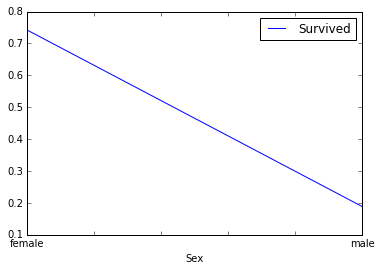

In [13]:
groupby_sex.mean().plot(x='Sex',y='Survived') # 明显女性存活率更高

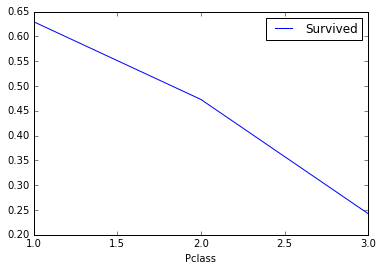

In [14]:
groupby_pclass.mean().plot(x='Pclass',y='Survived') # 明显社会等级更高的人存活率更高

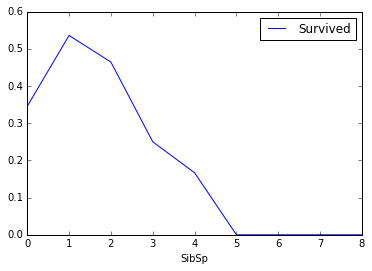

In [16]:
groupby_sibsp.mean().plot(x='SibSp',y='Survived') # 兄弟姐妹，丈夫妻子人数多的普遍存活率高

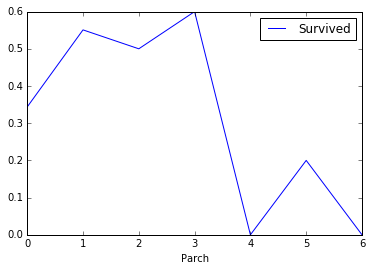

In [17]:
groupby_parch.mean().plot(x='Parch',y='Survived') # 父母孩子的个人貌似与存活率无显著关系

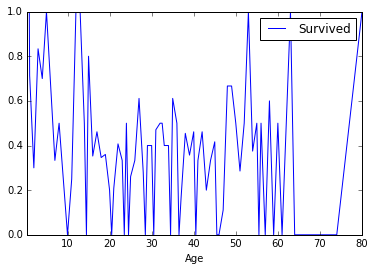

In [25]:
groupby_age.mean().plot(x='Age',y='Survived') # 父母孩子的个人貌似与存活率无显著关系

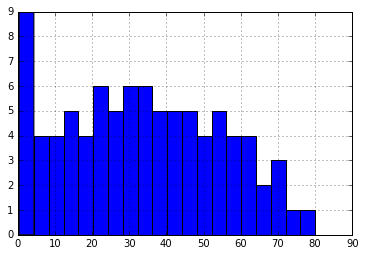

In [48]:
groupby_age.mean()['Age'].hist(bins=20)

In [9]:
# 皮尔逊系数，np.corrcoef(a)可计算行与行之间的相关系数，np.corrcoef(a,rowvar=0)用于计算各列之间的相关系数
# np.corrcoef(groupby_sex, rowvar=0)